# 2 Week Whole Well Barcode Extraction
Topological data analysis on 3D data from Susan's experiments
Goal: extract TDA parameters for the whole well at a two week time point


In [1]:
library(TDA)
library(repr)
library(stringr)
library("scatterplot3d")
library("ripserr")

Welcome to ripserr.


## Ripser loading and binding

In [2]:
## Parse raw output from Ripser
parseOutput = function( output ){
    
    ## Number of intervals by dimension
    indices            = grep( "persistence intervals in dim " , output , value = FALSE )
    maxDimension       = length( indices ) - 1
    indices            = c( indices , length( output ) )
    
    ## Convert output in matrix
    diagram = matrix(, ncol = 3, nrow = 0 )
    
    ## Loop each group of intervals by dimension
    for( dim in 0:maxDimension ){
        
        ## Select intervals
        if( dim == maxDimension ){
            intervals = output[ ( indices[ dim + 1 ] + 1):( indices[ dim + 2 ] ) ]
        }else{
            intervals = output[ ( indices[ dim + 1 ] + 1):( indices[ dim + 2 ] - 1 ) ]
        }
        
        ## Removed lines from output
        intervals = grep( "\\[\\d*\\.?\\d+\\,\\d*\\.?\\d+\\)" , intervals , value = TRUE )
        
        ## Remove punctuation from intervals
        intervals = gsub( "(\\s|\\[|\\))" , "" , intervals )
        
        ## Split interval and convert to numeric
        intervals = as.numeric( unlist( strsplit( intervals , "," ) ) )
        
        ## Convert ouput in matrix
        intervals = matrix( intervals , ncol = 2 , byrow = T )
        
        ## Add dimension column
        intervals = cbind( rep( dim , nrow( intervals ) ) , intervals )
        
        ## Add intervals to diagram
        diagram = rbind( diagram, intervals )
        
    }
    
    ## Format matrix to diagram format
    colnames( diagram ) = c( "dimension" , "Birth" , "Death" )
    
    return( diagram )    
}

## Calculate rips diagram using Ripser library
ripserDiag = function( X, dimension, threshold, format = "point-cloud" ){
    
    # Ripser likes to read files in, so use a temporary file
    f = tempfile()
    write.table(X, f, col.names = FALSE, row.names = FALSE)
    
    ## Set parameters as text
    dimension = as.character( dimension )
    threshold = as.character( threshold )
    
    ## Run Ripser using system command
    ripserOut = system2("/home/dbhaskar92/ripser/ripser", args = c("--dim", dimension, "--threshold", threshold, "--format", format , f), stdout = TRUE)
    
    return( parseOutput( ripserOut ) )
}

## Calculate Betti numbers for well A07
- Notes: Make sure to run these blocks sequentially


In [14]:
#Load the data from the spreadsheet
datU = read.csv('Susan3DSet2/A07.csv',header=FALSE)
code = data.matrix(datU)

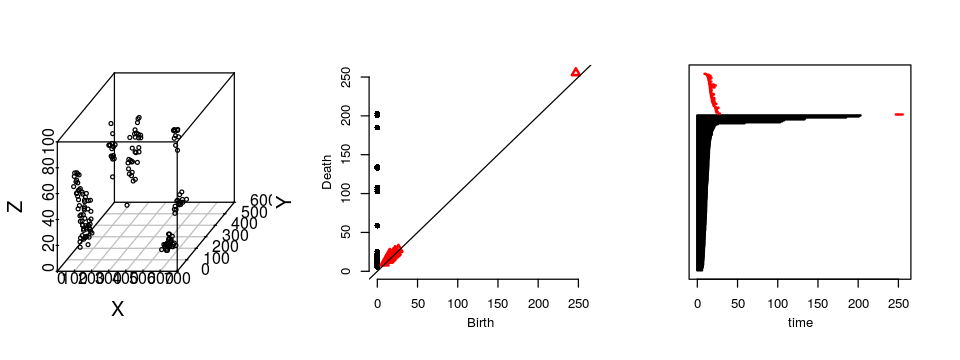

In [15]:
homology2_code <- ripserDiag(code, 2,900)

par(mfrow = c(1, 3), mai = c(0.8, 0.8, 0.3, 0.1))
options(repr.plot.width=8,repr.plot.height=3)

scatterplot3d(code, y=NULL, z=NULL, xlab="X", ylab="Y", zlab="Z")
TDA::plot.diagram(homology2_code, barcode = FALSE)
TDA::plot.diagram(homology2_code, barcode = TRUE)

## Calculate Betti numbers for well A08
- Notes: Make sure to run these blocks sequentially


In [16]:
#Load the data from the spreadsheet
datU = read.csv('Susan3DSet2/A08.csv',header=FALSE)
code = data.matrix(datU)

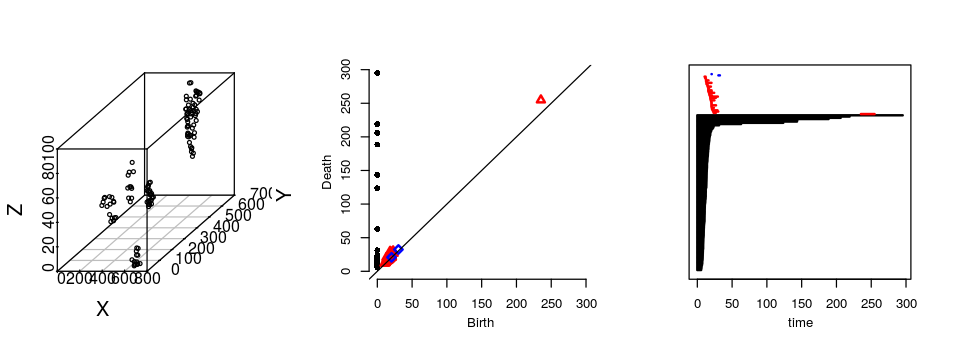

In [17]:
homology2_code <- ripserDiag(code, 2,900)

par(mfrow = c(1, 3), mai = c(0.8, 0.8, 0.3, 0.1))
options(repr.plot.width=8,repr.plot.height=3)

scatterplot3d(code, y=NULL, z=NULL, xlab="X", ylab="Y", zlab="Z")
TDA::plot.diagram(homology2_code, barcode = FALSE)
TDA::plot.diagram(homology2_code, barcode = TRUE)

## Calculate Betti numbers for well A09
- Notes: Make sure to run these blocks sequentially


In [18]:
#Load the data from the spreadsheet
datU = read.csv('Susan3DSet2/A09.csv',header=FALSE)
code = data.matrix(datU)

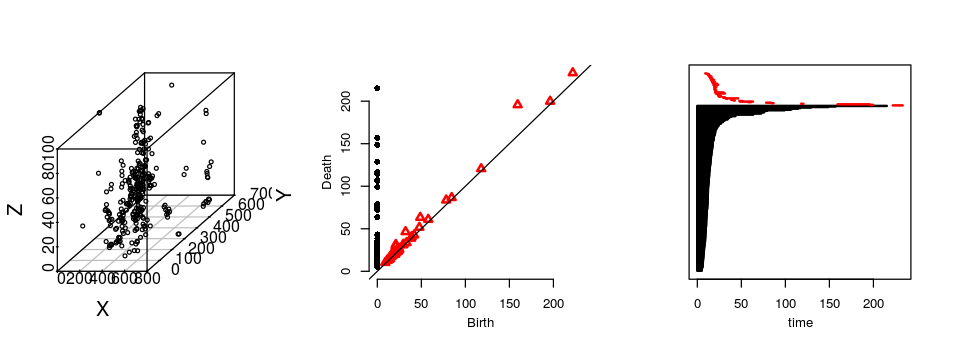

In [19]:
homology2_code <- ripserDiag(code, 2,900)

par(mfrow = c(1, 3), mai = c(0.8, 0.8, 0.3, 0.1))
options(repr.plot.width=8,repr.plot.height=3)

scatterplot3d(code, y=NULL, z=NULL, xlab="X", ylab="Y", zlab="Z")
TDA::plot.diagram(homology2_code, barcode = FALSE)
TDA::plot.diagram(homology2_code, barcode = TRUE)

## Calculate Betti numbers for well A12
- Notes: Make sure to run these blocks sequentially


In [20]:
#Load the data from the spreadsheet
datU = read.csv('Susan3DSet2/A12.csv',header=FALSE)
code = data.matrix(datU)

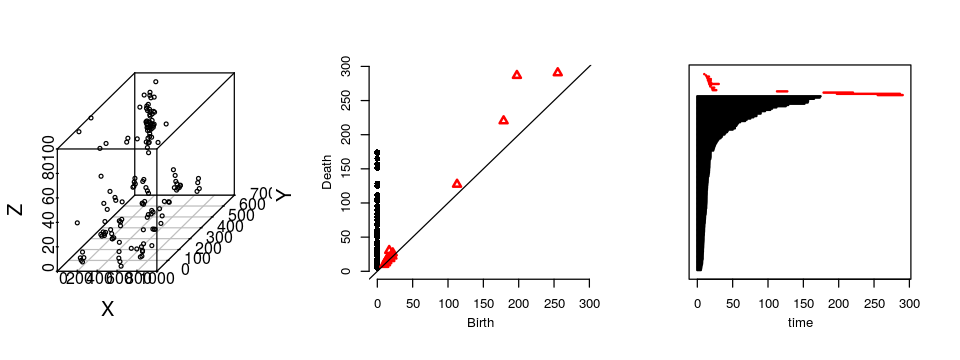

In [21]:
homology2_code <- ripserDiag(code, 2,900)

par(mfrow = c(1, 3), mai = c(0.8, 0.8, 0.3, 0.1))
options(repr.plot.width=8,repr.plot.height=3)

scatterplot3d(code, y=NULL, z=NULL, xlab="X", ylab="Y", zlab="Z")
TDA::plot.diagram(homology2_code, barcode = FALSE)
TDA::plot.diagram(homology2_code, barcode = TRUE)

## Calculate Betti numbers for well B10
- Notes: Make sure to run these blocks sequentially


In [22]:
#Load the data from the spreadsheet
datU = read.csv('Susan3DSet2/B10.csv',header=FALSE)
code = data.matrix(datU)

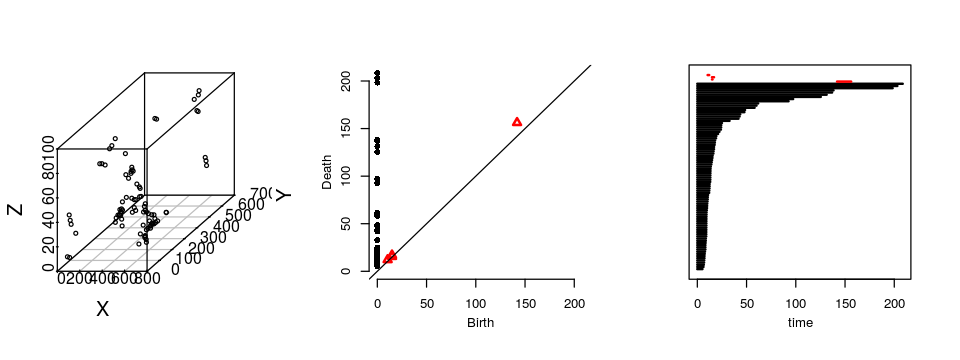

In [23]:
homology2_code <- ripserDiag(code, 2,900)

par(mfrow = c(1, 3), mai = c(0.8, 0.8, 0.3, 0.1))
options(repr.plot.width=8,repr.plot.height=3)

scatterplot3d(code, y=NULL, z=NULL, xlab="X", ylab="Y", zlab="Z")
TDA::plot.diagram(homology2_code, barcode = FALSE)
TDA::plot.diagram(homology2_code, barcode = TRUE)

## Calculate Betti numbers for well B12
- Notes: Make sure to run these blocks sequentially


In [25]:
#Load the data from the spreadsheet
datU = read.csv('Susan3DSet2/B12.csv',header=FALSE)
code = data.matrix(datU)

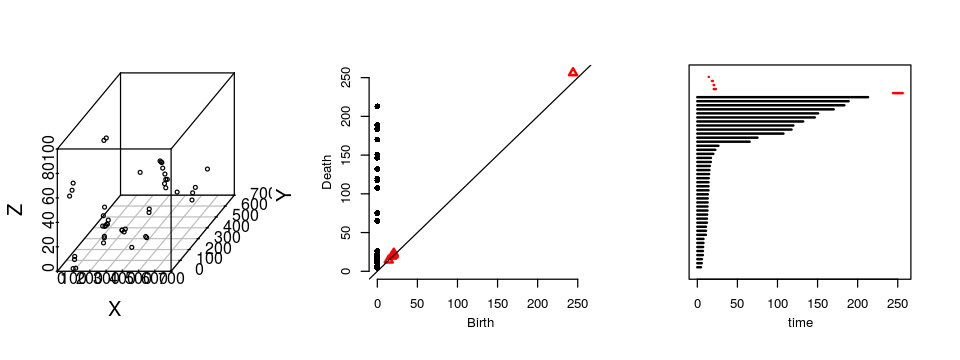

In [26]:
homology2_code <- ripserDiag(code, 2,900)

par(mfrow = c(1, 3), mai = c(0.8, 0.8, 0.3, 0.1))
options(repr.plot.width=8,repr.plot.height=3)

scatterplot3d(code, y=NULL, z=NULL, xlab="X", ylab="Y", zlab="Z")
TDA::plot.diagram(homology2_code, barcode = FALSE)
TDA::plot.diagram(homology2_code, barcode = TRUE)